In [ ]:
!pip install langgraph
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [ ]:
class AgentState(TypedDict):
  number1: int
  number2: int
  number3: int
  number4: int
  operation1: str
  operation2: str
  final1: int
  final2: int

In [ ]:
def adder1(state: AgentState) -> AgentState:
  state['final1'] = state['number1'] + state['number2']
  return state

def substractor1(state: AgentState) -> AgentState:
  state['final1'] = state['number1'] - state['number1']
  return state

def adder2(state: AgentState) -> AgentState:
  state['final2'] = state['number3'] + state['number4']
  return state

def substractor2(state: AgentState) -> AgentState:
  state['final2'] = state['number3'] - state['number4']
  return state

def decide_node1(state: AgentState) -> AgentState:
  if state['operation1'] == '+':
    return 'add_operation1'
  else:
    return 'sub_operation1'

def decide_node2(state: AgentState) -> AgentState:
  if state['operation2'] == '+':
    return 'add_operation2'
  else:
    return 'sub_operation2'


In [ ]:
graph = StateGraph(AgentState)

graph.add_node('add_node1', adder1)
graph.add_node('sub_node1', substractor1)
graph.add_node('add_node2', adder2)
graph.add_node('sub_node2', substractor2)

graph.add_node('router1', lambda state: state)
graph.add_node('router2', lambda state: state)

graph.add_edge(START, 'router1')

graph.add_conditional_edges(
    'router1',
    decide_node1,
    {
        #edge: node
        'add_operation1': 'add_node1',
        'sub_operation1': 'sub_node1'
    }
)

graph.add_edge('add_node1', 'router2')
graph.add_edge('sub_node1', 'router2')

graph.add_conditional_edges(
    'router2',
    decide_node2,
    {
        #edge: node
        'add_operation2': 'add_node2',
        'sub_operation2': 'sub_node2'
    }
)

graph.add_edge('add_node2', END)
graph.add_edge('sub_node2', END)

app = graph.compile()

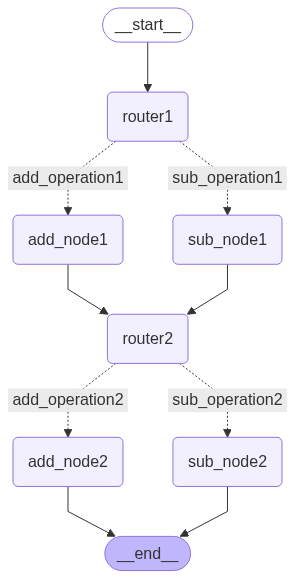

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
intial1 = AgentState(number1=1, number2=2, number3=3, number4=4, operation1='+', operation2='+')
app.invoke(intial1)

{'number1': 1,
 'number2': 2,
 'number3': 3,
 'number4': 4,
 'operation1': '+',
 'operation2': '+',
 'final1': 3,
 'final2': 7}

In [ ]:
intial1 = AgentState(number1=1, number2=2, number3=3, number4=4, operation1='+', operation2='-')
app.invoke(intial1)

{'number1': 1,
 'number2': 2,
 'number3': 3,
 'number4': 4,
 'operation1': '+',
 'operation2': '-',
 'final1': 3,
 'final2': -1}

In [ ]:
result = app.invoke({'number1': 12, 'number2': 5, 'number3': 16, 'number4': 10, 'operation1': '+', 'operation2': '-'})
result

{'number1': 12,
 'number2': 5,
 'number3': 16,
 'number4': 10,
 'operation1': '+',
 'operation2': '-',
 'final1': 17,
 'final2': 6}